In [1]:
import numpy as np
import pandas
import pm4py
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
import scipy.stats as stats
import ot
import os
from tqdm import tqdm
import sys
sys.path.append('../../TaskExecutionTimeMining/')
from drbart_parser import *
from event_log_transformer import *

In [2]:
event_log = pandas.read_pickle('../transformed_event_logs/BPIC_2017_waiting_time.pickle')
event_log

,Action_schedule,org:resource,concept:name,EventOrigin_schedule,EventID_schedule,lifecycle:transition_schedule,time:timestamp_schedule,case:LoanGoal_schedule,case:ApplicationType_schedule,case:concept:name,...,User_95,User_99,W_Assess potential fraud,W_Call after offers,W_Call incomplete files,W_Complete application,W_Handle leads,W_Personal Loan collection,W_Shortened completion,W_Validate application
0,Created,User_117,W_Validate application,Workflow,Workitem_781654767,schedule,2016-01-13 13:10:55.144000+00:00,Existing loan takeover,New credit,Application_652823628,...,0,0,0,0,0,0,0,0,0,1
1,Created,User_29,W_Call incomplete files,Workflow,Workitem_1921913728,schedule,2016-02-15 13:31:05.064000+00:00,Car,New credit,Application_1825972191,...,0,0,0,0,1,0,0,0,0,0
2,Created,User_113,W_Validate application,Workflow,Workitem_903822042,schedule,2016-01-13 12:16:46.785000+00:00,Home improvement,New credit,Application_2049529862,...,0,0,0,0,0,0,0,0,0,1
3,Created,User_100,W_Call incomplete files,Workflow,Workitem_412264282,schedule,2016-01-29 09:50:44.466000+00:00,Existing loan takeover,New credit,Application_767475240,...,0,0,0,0,1,0,0,0,0,0
4,Created,User_99,W_Call incomplete files,Workflow,Workitem_1866807921,schedule,2016-01-11 12:13:36.080000+00:00,Home improvement,New credit,Application_1547844908,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Created,User_126,W_Validate application,Workflow,Workitem_1789687393,schedule,2017-01-06 10:00:20.926000+00:00,Car,New credit,Application_1168372021,...,0,0,0,0,0,0,0,0,0,1
6713,Created,User_136,W_Call incomplete files,Workflow,Workitem_1944829003,schedule,2017-01-06 15:22:14.577000+00:00,Car,New credit,Application_1168372021,...,0,0,0,0,1,0,0,0,0,1
6714,Created,User_83,W_Call incomplete files,Workflow,Workitem_1647814873,schedule,2017-01-13 08:11:32.346000+00:00,Existing loan takeover,New credit,Application_1616238013,...,0,0,0,0,1,0,0,0,0,0
6715,Created,User_31,W_Call incomplete files,Workflow,Workitem_1909664337,schedule,2017-01-05 11:30:21.669000+00:00,Car,New credit,Application_1107993134,...,0,0,0,0,1,0,0,0,0,0


In [3]:
drbart = DRBART(parser_dir = '../../../models/bpic2017/waiting_time/test/')

In [4]:
event_log['duration_sampled_seconds'] = event_log.apply(lambda x : int(round(
                                                drbart.sample([x['org:resource'], x['concept:name'],
                                                              ],
                                                              [x['seconds_in_day']])[1][0]
                                                                                ,0)), axis=1)

In [10]:
event_log

,Action_schedule,org:resource,concept:name,EventOrigin_schedule,EventID_schedule,lifecycle:transition_schedule,time:timestamp_schedule,case:LoanGoal_schedule,case:ApplicationType_schedule,case:concept:name,...,W_Call incomplete files,W_Complete application,W_Handle leads,W_Personal Loan collection,W_Shortened completion,W_Validate application,duration_sampled_seconds,duration_sampled_seconds_min,duration_sampled_seconds_max,real_duration_in_range
0,Created,User_117,W_Validate application,Workflow,Workitem_781654767,schedule,2016-01-13 13:10:55.144000+00:00,Existing loan takeover,New credit,Application_652823628,...,0,0,0,0,0,1,970257,40646.824771,2.947027e+06,True
1,Created,User_29,W_Call incomplete files,Workflow,Workitem_1921913728,schedule,2016-02-15 13:31:05.064000+00:00,Car,New credit,Application_1825972191,...,1,0,0,0,0,0,163426,-26020.046902,7.830459e+06,True
2,Created,User_113,W_Validate application,Workflow,Workitem_903822042,schedule,2016-01-13 12:16:46.785000+00:00,Home improvement,New credit,Application_2049529862,...,0,0,0,0,0,1,1228686,-30472.989373,4.913613e+06,True
3,Created,User_100,W_Call incomplete files,Workflow,Workitem_412264282,schedule,2016-01-29 09:50:44.466000+00:00,Existing loan takeover,New credit,Application_767475240,...,1,0,0,0,0,0,135577,-124137.644066,3.411022e+06,True
4,Created,User_99,W_Call incomplete files,Workflow,Workitem_1866807921,schedule,2016-01-11 12:13:36.080000+00:00,Home improvement,New credit,Application_1547844908,...,1,0,0,0,0,0,19655,-21126.751634,3.450820e+06,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Created,User_126,W_Validate application,Workflow,Workitem_1789687393,schedule,2017-01-06 10:00:20.926000+00:00,Car,New credit,Application_1168372021,...,0,0,0,0,0,1,2306671,-111273.395368,3.592304e+06,True
6713,Created,User_136,W_Call incomplete files,Workflow,Workitem_1944829003,schedule,2017-01-06 15:22:14.577000+00:00,Car,New credit,Application_1168372021,...,1,0,0,0,0,1,577505,-4872.983480,9.465103e+06,True
6714,Created,User_83,W_Call incomplete files,Workflow,Workitem_1647814873,schedule,2017-01-13 08:11:32.346000+00:00,Existing loan takeover,New credit,Application_1616238013,...,1,0,0,0,0,0,1433995,4025.620778,2.997539e+06,True
6715,Created,User_31,W_Call incomplete files,Workflow,Workitem_1909664337,schedule,2017-01-05 11:30:21.669000+00:00,Car,New credit,Application_1107993134,...,1,0,0,0,0,0,131319,-366561.192392,9.634332e+06,True


In [6]:
def min_max_time(x):
    samples = drbart.sample([x['org:resource'], x['concept:name']], [x['seconds_in_day']], n = 100)[1]
    return np.min(samples), np.max(samples)

event_log[['duration_sampled_seconds_min', 'duration_sampled_seconds_max']] = event_log.apply(lambda x : min_max_time(x), axis = 1, result_type='expand')

In [27]:
def min_max_time_percentile(x, percentile):
    samples = drbart.sample([x['org:resource'], x['concept:name']], [x['seconds_in_day']], n = 100)[1]
    return np.percentile(samples, percentile), np.percentile(samples, 100-percentile)

for i in range(0,50+1,5):
    event_log[['duration_sampled_seconds_min_'+str(i), 'duration_sampled_seconds_max_'+str(i)]] = \
        event_log.apply(lambda x : min_max_time_percentile(x, i), axis = 1, result_type='expand')
    event_log['real_duration_in_range_'+str(i)] = False
    event_log.loc[
        (event_log['duration_sampled_seconds_min_'+str(i)] <= event_log['duration_seconds']) & (event_log['duration_sampled_seconds_max_'+str(i)] >= event_log['duration_seconds']),
    'real_duration_in_range_'+str(i)
    ] = True

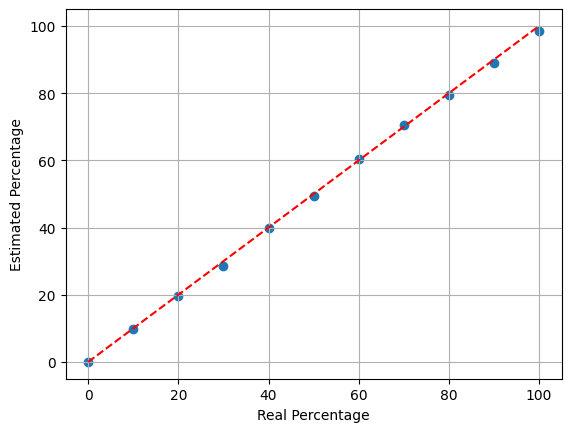

In [30]:
x, y = [], []
for i in range(0,50+1,5):
    x.append(100-i*2)
    y.append(event_log['real_duration_in_range_'+str(i)].mean()*100)

plt.scatter(x, y)
plt.plot([0,100], [0,100], color='red', linestyle='--')
plt.grid(True)
plt.ylabel('Estimated Percentage')
plt.show()

In [ ]:
e = plt.hist(event_log['duration_sampled_seconds'], 1000, alpha=0.5, label='sampled')
plt.hist(event_log['duration_seconds'], e[1], alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.show()

In [ ]:
event_log['duration_diff'] = event_log['duration_sampled_seconds'] - event_log['duration_seconds']

In [ ]:
plt.hist(event_log['duration_diff'], 200, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.show()

In [ ]:
event_log[np.abs(event_log['duration_diff']) > 100000]

In [ ]:
#mean absolute error
data = np.abs(event_log['duration_diff'])

# Calculate statistics
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
variance = np.var(data)
min_value = np.min(data)
max_value = np.max(data)
percentile_25 = np.percentile(data, 25)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Variance:", variance)
print("Minimum:", min_value)
print("Maximum:", max_value)
print("25th Percentile:", percentile_25)


In [ ]:
case_duration_log = TransformEventLog.case_duration_event_log_2(event_log,
                                                              'duration',
                                                              'case_duration_real')

In [ ]:
case_duration_log

In [ ]:
case_duration_sampled = TransformEventLog.case_duration_event_log_2(event_log, 'duration_sampled', 'case_duration_sampled')

In [ ]:
case_duration_sampled

In [ ]:
case_duration_sampled[case_duration_sampled['duration_sampled_seconds'] < 0]

In [ ]:
bins = 200
r = plt.hist(case_duration_sampled, bins, alpha=0.5, label='real')
plt.hist(case_duration_log, r[1], alpha=0.5, label='sampled')
plt.legend(loc='upper right')
plt.show()